In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
folder_names = os.listdir('data')

In [3]:
colnames = ['id', 'posnum', 'seglen_hor', 'seglen_ver', 'segdist_hor', 'segdist_ver', 'crossdeg', 'segdeg_hor', 'segdeg_ver', 'dist_hor', 'dist_ver']

In [99]:
def collect_data(folder_names):
    data = []
    labels = []
    posnums = []
    for name in folder_names:
        d = pd.read_csv('data/' + name + '/data.txt', names=colnames)
        a = pd.read_csv('data/' + name + '/ans.txt', header=None).values.ravel()
        for row in d.values:
            data.append(row[2:])
            label = 1 if row[0] in a else 0
            labels.append(label)
            posnums.append(int(row[1]))
    return np.array(data), np.array(labels), np.array(posnums)

In [110]:
data[:30]

array([[6.665700e-02, 9.201800e-01, 5.649000e-03, 6.980000e-04,
        1.536481e+00, 1.696900e-02, 1.553450e+00, 7.787000e-02,
        6.709000e-03],
       [8.557210e-01, 9.201800e-01, 3.680000e-03, 1.813000e-03,
        1.481262e+00, 7.218800e-02, 1.553450e+00, 5.536200e-02,
        1.252600e-02],
       [8.557210e-01, 8.093910e-01, 7.108000e-03, 1.512900e-02,
        1.552376e+00, 7.218800e-02, 1.517029e+00, 1.930500e-02,
        3.509700e-02],
       [7.037700e-01, 1.785160e-01, 1.896780e-01, 2.389600e-02,
        1.560984e+00, 6.832100e-02, 1.512288e+00, 3.689200e-02,
        1.765500e-02],
       [6.665700e-02, 8.093910e-01, 7.046140e-01, 5.885100e-02,
        1.533998e+00, 1.696900e-02, 1.517029e+00, 4.548300e-02,
        1.708700e-02],
       [6.665700e-02, 7.216840e-01, 1.769900e-02, 6.033300e-02,
        1.553231e+00, 1.696900e-02, 1.570200e+00, 1.010190e-01,
        7.018000e-03],
       [7.037700e-01, 9.201800e-01, 7.452800e-02, 5.046000e-03,
        1.519821e+00, 6.832100

In [115]:
svm = gs.best_estimator_

In [121]:
for i in range(20):
    print(svm.decision_function([data[i]]), svm.predict([data[i]]))

[-0.57855063] [0]
[1.37215832] [1]
[0.79155067] [1]
[-2.11256576] [0]
[-4.47572447] [0]
[-1.66399035] [0]
[0.45264269] [1]
[0.79787476] [1]
[-5.12919507] [0]
[-0.58917692] [0]
[-4.09628566] [0]
[-8.91663627] [0]
[-1.66324529] [0]
[-1.8247874] [0]
[-6.94494292] [0]
[-7.42506766] [0]
[-3.81342995] [0]
[-5.76882616] [0]
[-0.99993735] [0]
[-4.68352657] [0]


In [123]:
for i in range(20):
    print(forest.predict_proba([data[i]]), forest.predict([data[i]]))

[[0.10555556 0.89444444]] [1]
[[0.025 0.975]] [1]
[[0.07818182 0.92181818]] [1]
[[0.69211039 0.30788961]] [0]
[[0.86388889 0.13611111]] [0]
[[0.69305556 0.30694444]] [0]
[[0.23095238 0.76904762]] [1]
[[0.09333333 0.90666667]] [1]
[[0.95833333 0.04166667]] [0]
[[0.62261905 0.37738095]] [0]
[[0.59555556 0.40444444]] [0]
[[0.81833333 0.18166667]] [0]
[[0.52309524 0.47690476]] [0]
[[1. 0.]] [0]
[[0.89404762 0.10595238]] [0]
[[0.9375 0.0625]] [0]
[[1. 0.]] [0]
[[0.95833333 0.04166667]] [0]
[[0.35484127 0.64515873]] [1]
[[1. 0.]] [0]


In [ ]:
def rank_accuracy(true_labels, pred_probs, posnums, n_correct=3):
    positive_probs = pred_probs[:, 1]
    indice = np.argsort(positive_probs)
    

In [117]:
data, labels, posnums = collect_data(folder_names)

In [118]:
data_raw = data.copy()

In [119]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
data = stdsc.fit_transform(data)

In [6]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(data)
transformed = pca.fit_transform(data)

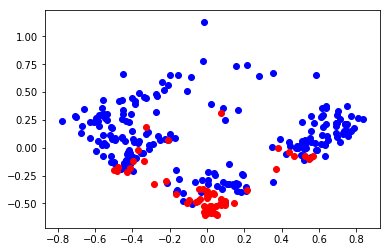

In [7]:
plt.scatter(transformed[labels==0][:,0], transformed[labels==0][:,1], c='blue')
plt.scatter(transformed[labels==1][:,0], transformed[labels==1][:,1], c='red')

In [24]:
from sklearn.model_selection import train_test_split
data_train, data_test, labels_train, labels_test = \
    train_test_split(data, labels, test_size=0.3)

In [25]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import f1_score
lr = LogisticRegressionCV(cv=5)
lr.fit(data_train, labels_train)
pred_train = lr.predict(data_train)
pred_test = lr.predict(data_test)
print(np.mean(labels_train == pred_train))
print(np.mean(labels_test == pred_test))
print(f1_score(labels_test, pred_test))

0.9105263157894737
0.8780487804878049
0.7058823529411764


In [26]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(labels_train, pred_train))
print(confusion_matrix(labels_test, pred_test))

[[151   5]
 [ 12  22]]
[[60  0]
 [10 12]]


In [27]:
lr.C_

array([2.7825594])

In [28]:
from sklearn import svm
svm = svm.SVC()
svm.fit(data_train, labels_train)

/home/taisei/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [29]:
print(svm.score(data_train, labels_train))
print(svm.score(data_test, labels_test))

0.9052631578947369
0.8536585365853658


In [31]:
from sklearn.model_selection import GridSearchCV
parameters = [
    {'C': [0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10]}
]
gs = GridSearchCV(svm, parameters, cv=5)

In [32]:
gs.fit(data_train, labels_train)

/home/taisei/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'C': [0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [33]:
print(gs.best_score_)
print(gs.best_params_)

0.8947368421052632
{'C': 100, 'gamma': 0.01}


In [34]:
pred_train = gs.predict(data_train)
pred_test = gs.predict(data_test)

In [35]:
print(confusion_matrix(labels_train, pred_train))
print(confusion_matrix(labels_test, pred_test))

[[151   5]
 [ 11  23]]
[[60  0]
 [11 11]]


In [36]:
print(f1_score(labels_train, pred_train), f1_score(labels_test, pred_test))

0.7419354838709677 0.6666666666666666


In [69]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10)
forest.fit(data_train, labels_train)
pred_train = forest.predict(data_train)
pred_test = forest.predict(data_test)

In [70]:
print(confusion_matrix(labels_train, pred_train))
print(confusion_matrix(labels_test, pred_test))

[[155   1]
 [  2  32]]
[[57  3]
 [ 8 14]]


In [71]:
forest_params = {
    'max_features': [1, 'auto', None],
    'max_depth': [1, 5, 10, None],
    'min_samples_leaf': [1,2,4]
}

gs_forest = GridSearchCV(RandomForestClassifier(), forest_params,
                         scoring='f1', cv=5)
gs_forest.fit(data_train, labels_train)

/home/taisei/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/taisei/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/taisei/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/taisei/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/taisei/.local/lib/python3.6/site-packages/sklearn/metrics/

/home/taisei/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/taisei/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/taisei/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/taisei/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/taisei/.local/lib/python3.6/site-packages/sklearn/

/home/taisei/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/taisei/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/taisei/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/taisei/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/taisei/.local/lib/python3.6/site-packages/sklearn/

/home/taisei/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/taisei/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/taisei/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/taisei/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/taisei/.local/lib/python3.6/site-packages/sklearn/

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_features': [1, 'auto', None], 'max_depth': [1, 5, 10, None], 'min_samples_leaf': [1, 2, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [72]:
gs_forest.best_params_

{'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 4}

In [73]:
gs_forest.best_score_

0.6596770334928229

In [74]:
forest = gs_forest.best_estimator_
pred_train = forest.predict(data_train)
pred_test = forest.predict(data_test)
print(confusion_matrix(labels_train, pred_train))
print(confusion_matrix(labels_test, pred_test))

[[152   4]
 [  6  28]]
[[59  1]
 [10 12]]


In [75]:
print(f1_score(labels_train, pred_train), f1_score(labels_test, pred_test))

0.8484848484848485 0.6857142857142856


In [76]:
features = np.array(colnames[2:])
features

array(['seglen_hor', 'seglen_ver', 'segdist_hor', 'segdist_ver',
       'crossdeg', 'segdeg_hor', 'segdeg_ver', 'dist_hor', 'dist_ver'],
      dtype='<U11')

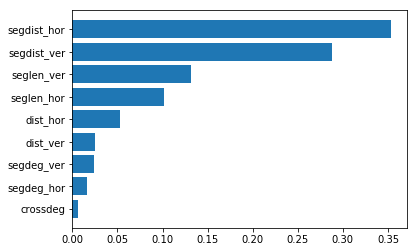

In [77]:
forest = gs_forest.best_estimator_
importances = forest.feature_importances_
indice = np.argsort(importances)
plt.barh(range(len(indice)), importances[indice])
plt.yticks(range(len(indice)), features[indice])
plt.show()

In [56]:
from imblearn.under_sampling import RandomUnderSampler

In [57]:
positive_count = labels_train.sum()
rus = RandomUnderSampler(ratio={0:positive_count, 1:positive_count})
data_train_rus, labels_train_rus = rus.fit_sample(data_train, labels_train)

In [61]:
lr = LogisticRegressionCV(cv=5)
lr.fit(data_train_rus, labels_train_rus)
train_pred = lr.predict(data_train)
test_pred = lr.predict(data_test)

In [62]:
print(confusion_matrix(labels_train, train_pred))
print(confusion_matrix(labels_test, test_pred))

[[120  36]
 [  4  30]]
[[44 16]
 [ 5 17]]


In [63]:
f1_score(labels_train, train_pred)

0.6

In [64]:
f1_score(labels_test, test_pred)

0.6181818181818182

In [78]:
forest_params = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_leaf': [1,2,4,8]
}
gs_forest = GridSearchCV(RandomForestClassifier(), forest_params, cv=5)
gs_forest.fit(data_train_rus, labels_train_rus)

/home/taisei/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/taisei/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/taisei/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/taisei/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/taisei/.local/lib/python3.6/site-packages/sklearn/

/home/taisei/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/taisei/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/taisei/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/taisei/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/taisei/.local/lib/python3.6/site-packages/sklearn/

/home/taisei/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/taisei/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/taisei/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/taisei/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/taisei/.local/lib/python3.6/site-packages/sklearn/

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [5, 10, 15, 20, None], 'min_samples_leaf': [1, 2, 4, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [79]:
gs_forest.best_params_

{'max_depth': 5, 'min_samples_leaf': 2}

In [80]:
forest = gs_forest.best_estimator_

In [81]:
pred_train = forest.predict(data_train)
pred_test = forest.predict(data_test)

In [82]:
print(np.mean(labels_train == pred_train))
print(np.mean(labels_test == pred_test))

0.8315789473684211
0.8536585365853658


In [83]:
print(f1_score(labels_train, pred_train))
print(f1_score(labels_test, pred_test))

0.673469387755102
0.76


In [84]:
print(confusion_matrix(labels_train, pred_train))
print(confusion_matrix(labels_test, pred_test))

[[125  31]
 [  1  33]]
[[51  9]
 [ 3 19]]


In [85]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(0.5)
data_train_smote, labels_train_smote = smote.fit_sample(data_train, labels_train)

In [86]:
forest_params = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_leaf': [1,2,4,8]
}
gs_forest = GridSearchCV(RandomForestClassifier(), forest_params, cv=5)
gs_forest.fit(data_train_rus, labels_train_rus)
forest = gs_forest.best_estimator_
pred_train = forest.predict(data_train)
pred_test = forest.predict(data_test)

/home/taisei/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/taisei/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/taisei/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/taisei/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/taisei/.local/lib/python3.6/site-packages/sklearn/

/home/taisei/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/taisei/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/taisei/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/taisei/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/taisei/.local/lib/python3.6/site-packages/sklearn/

/home/taisei/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/taisei/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/taisei/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/taisei/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/taisei/.local/lib/python3.6/site-packages/sklearn/

In [87]:
print(gs_forest.best_params_)

{'max_depth': 10, 'min_samples_leaf': 4}


In [88]:
print(np.mean(labels_train == pred_train))
print(np.mean(labels_test == pred_test))
print(f1_score(labels_train, pred_train))
print(f1_score(labels_test, pred_test))
print(confusion_matrix(labels_train, pred_train))
print(confusion_matrix(labels_test, pred_test))

0.8631578947368421
0.9024390243902439
0.7111111111111111
0.8260869565217391
[[132  24]
 [  2  32]]
[[55  5]
 [ 3 19]]
